**Data Cleaning**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.chdir('/Users/wynnephilpott/Documents/missing pauldron/Data Science/datasets') #my directory
df = pd.read_csv('speed.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


Lets have a look at what's missing.

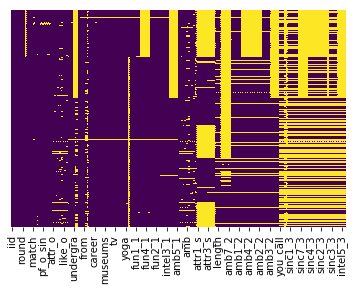

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Lots of missing data. Why dont we drop fields missing more than 10% of data.

In [6]:
for column in df:
    pct = (df[column].count())/len(df[column])
    if pct < .90:
        df.drop(column,axis=1,inplace=True)

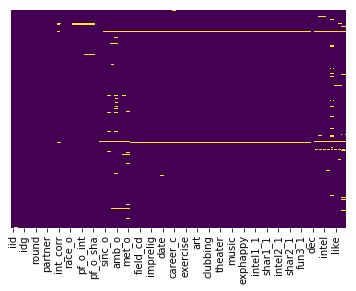

In [104]:
#remaining missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Lets remove fields that we cannot use for our machine learning algorithms

In [7]:
objects = []
for field in df:
    if df[field].dtype == 'O':
        objects.append(field)
objects

['field', 'from', 'career']

In [8]:
df.drop(objects,axis=1,inplace=True)

In this dataset, daters appear multiple times, 1 time for each parter they are paired up with and subsequently rate. Lets use 'groupby' to get an idea of how many unique individuals there are. How many would we lose if we were to drop those with n/as?

In [9]:
print(df.dropna().groupby('iid').mean().shape)
print(df.groupby('iid').mean().shape)

(524, 83)
(551, 83)


Perhaps we can expense a few more columns to salvage as much of these 27 individuals as we can

In [10]:
l = []
for column in df:
    pct = (df[column].count())/len(df[column])
    l.append(pct)

In [11]:
percent  = pd.DataFrame()

percent['Columns']= df.columns
percent['%']= l

In [12]:
percent.tail()

,Columns,%
79,fun,0.958224
80,amb,0.915016
81,like,0.971354
82,prob,0.963118
83,met,0.955240


B/c these are important fields, we ought to keep them and proceed with wiping out the missing rows.

In [13]:
df.dropna(inplace=True)

Notice how some fields are 'duplicates' like iid and subsequently age, field, self assessments etc. Lets make these a dataset.

In [23]:
dupe = pd.read_csv('duplicates.csv') #a file that contains the names of the columns w/ duplicates
dupe = dupe['col'].tolist() #convert to a format in which we can use the .loc function

dfd = df.loc[:,dupe]
dfd = dfd.groupby('iid').mean() 
dfd.dropna(axis=1,inplace=True) #b/c dupliactes can contain columns we dropped above

In [15]:
df.shape

(6193, 84)

In [16]:
dfd.shape

(524, 51)

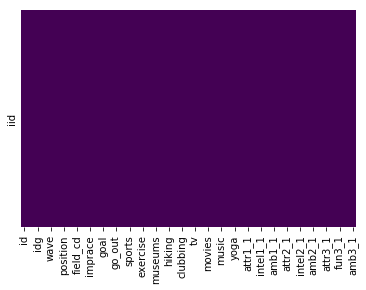

In [17]:
#remaining data
sns.heatmap(dfd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we have the self assessment data on the 524
subjects.

Let's read in the data that were not 'duplicates', the scores that the individuals gave their partners in the dating rounds.

In [19]:
score = pd.read_csv('scores.csv')
score = score['col'].tolist()

dfs = df.loc[:,score]
dfs.dropna(axis=1,inplace=True)

The .dropna above will have dropped the samples we dropped in our 'duplicates' dataset but let's double check the 2 dfs line up.

In [20]:
dfd.groupby('iid').mean().shape

(524, 51)

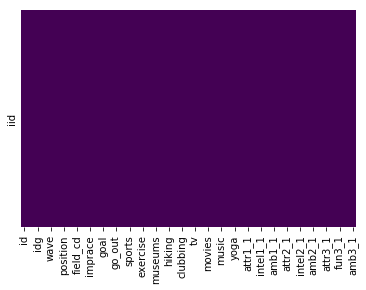

In [21]:
#missing data
sns.heatmap(dfd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
dfd.to_excel('dfd.xlsx')

In [39]:
dfs.to_excel('dfs.xlsx')

We now have 2 datasets to work with, one for analyzing the individual speed-daters and one for model-building that we will use to actually predict matches.